## 상관관계

In [3]:
#판다스 라이브러리 불러오기
import pandas as pd 
import matplotlib as mpl
import matplotlib.pylab as plt
import numpy as np    
import seaborn as sns 

#데이터불러오기
file_path= 'advertising.csv'

#read csv()함수로 데이터프레임 변환 
df = pd.read_csv(file_path)
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


## scatter plot

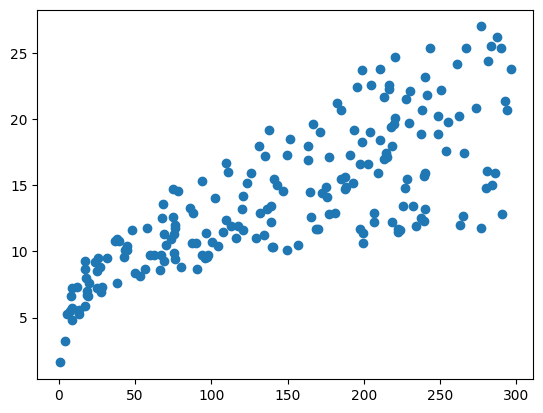

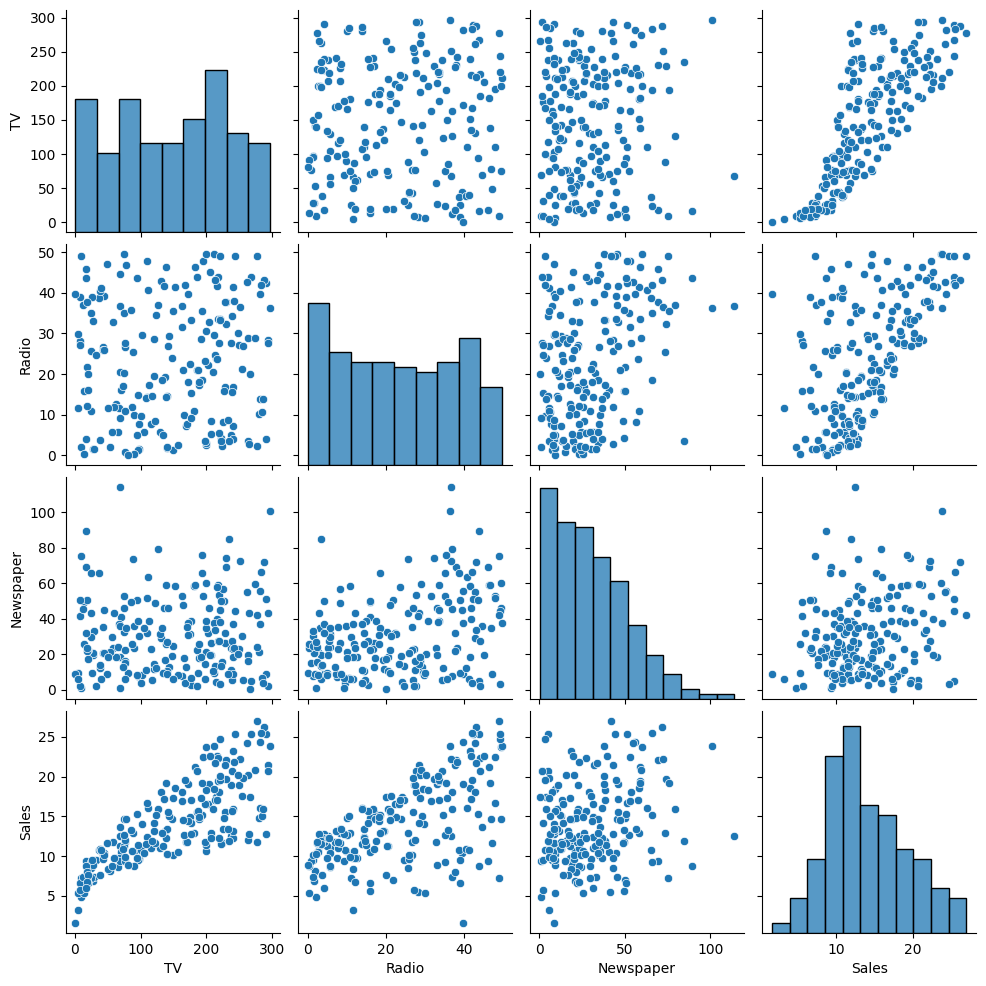

In [4]:
# 두 연속형 변수 스캐터플롯 그리기
plt.scatter(df['TV'], df['Sales'])

sns.pairplot(df)

## 상관계수 확인

In [5]:
corr = df.corr() #(method = 'pearson')
corr

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


## 히트맵으로 상관도 시각화

<Axes: >

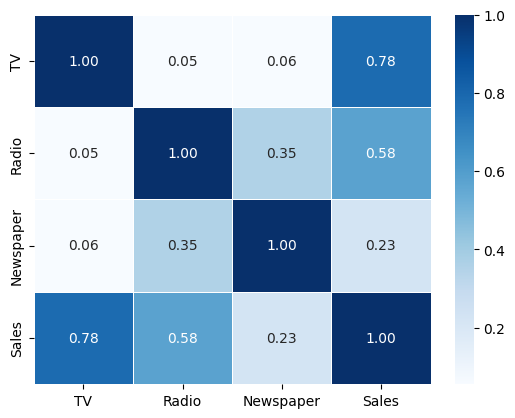

In [6]:
sns.heatmap(data = df.corr() , annot=True, fmt = '.2f', linewidths=.5, cmap='Blues') #색깔이 진할수록 강한 상관관계를 보인다.

<Axes: >

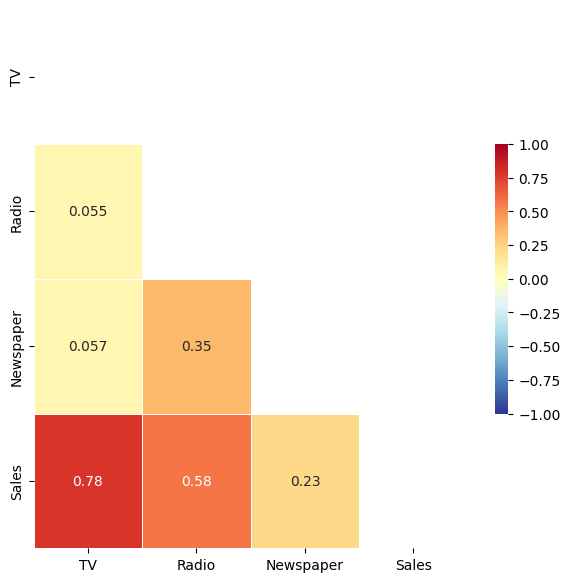

In [7]:
df1 = df.corr(numeric_only=True)
# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(7,7) )

# 삼각형 마스크를 만든다(위 삼각형 True, 아래 삼각형 False)
mask = np.zeros_like(df1)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(df1, cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1 )  # 컬러바 범위 -1 ~ 1

## 성적 예제

In [8]:
#판다스 라이브러리 불러오기
import pandas as pd 
import matplotlib.pylab as plt
import numpy as np    
import seaborn as sns 

#데이터불러오기
file_path= 'exam_sample_cor.csv'

#read csv()함수로 데이터프레임 변환 
df = pd.read_csv(file_path)
df

,student_no,class,science,english,math,sex
0,1,A,92,98,97,m
1,2,A,62,66,65,w
2,3,A,81,86,84,w
3,4,A,73,72,71,m
4,5,B,65,66,69,w
5,6,B,86,89,87,m
6,7,B,91,90,92,m
7,8,B,77,78,76,w
8,9,C,95,98,99,w
9,10,C,83,82,85,w


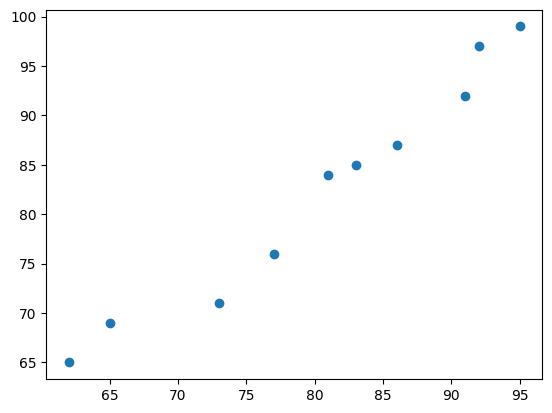

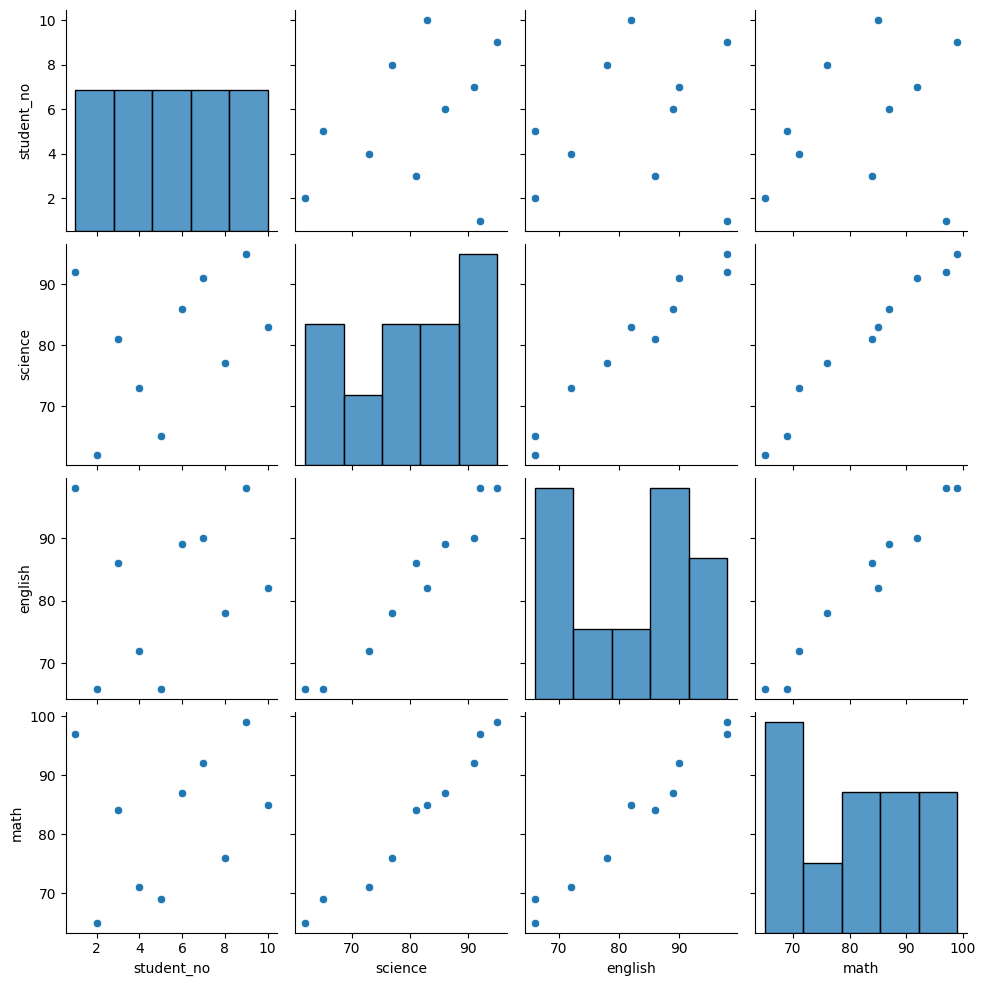

In [9]:
# 과학 - 수학 두 연속형 변수 스캐터플롯 그리기
plt.scatter(df['science'], df['math'])

sns.pairplot(df)

In [10]:
# 상관계수 구하기
df.corr(numeric_only=True) #그냥 하며 error class, sex때문에 numeric_only=True가 필요하다.
#student number가 높은 편인데 data가 높아지면 0.01밑으로 떨어질 것이다. 

,student_no,science,english,math
student_no,1.000000,0.334156,0.180978,0.264716
science,0.334156,1.000000,0.976411,0.982180
english,0.180978,0.976411,1.000000,0.984986
math,0.264716,0.982180,0.984986,1.000000


<Axes: >

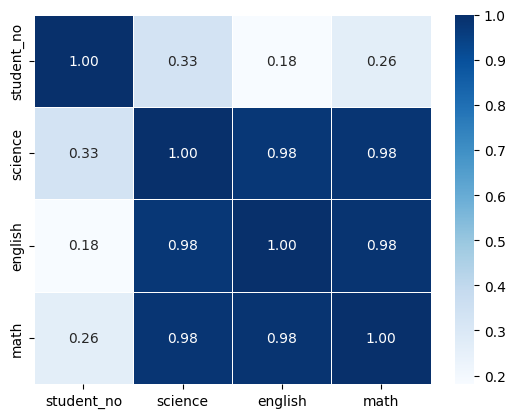

In [11]:
# 히트맵 그리기
sns.heatmap(data=df.corr(numeric_only=True),annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

<Axes: >

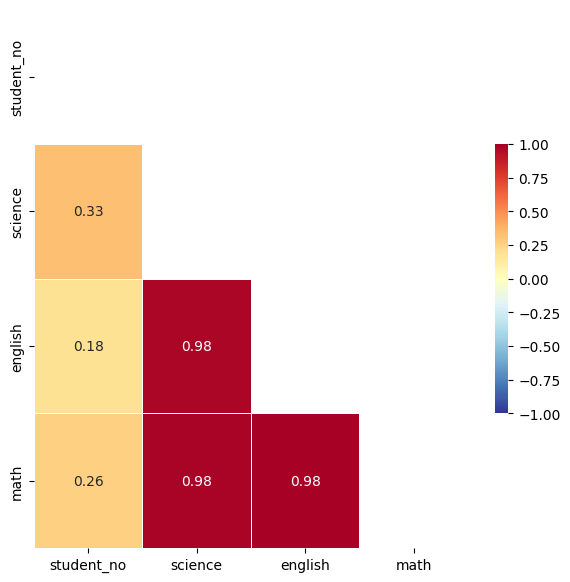

In [12]:
df1 = df.corr(numeric_only=True)
# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(7,7) )

# 삼각형 마스크를 만든다(위 삼각형 True, 아래 삼각형 False)
mask = np.zeros_like(df1)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(df1, cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1 )  # 컬러바 범위 -1 ~ 1

## 단순회귀

In [13]:
#판다스 라이브러리 불러오기
import pandas as pd 
import matplotlib as mpl
import matplotlib.pylab as plt
import numpy as np    
import seaborn as sns 

#데이터불러오기
file_path= 'advertising.csv'

#read csv()함수로 데이터프레임 변환 
df = pd.read_csv(file_path)
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


## 회귀그래프그리기 

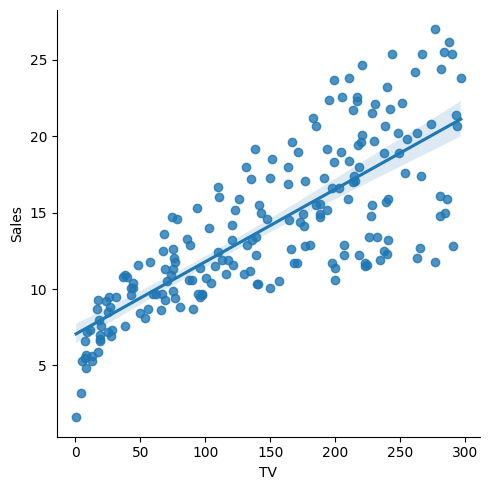

In [14]:
sns.lmplot(x='TV', y='Sales',data=df) #회귀식 fitting한 그래프 올라갈수록 잔차가 커진다. TV량이 늘어날수록 오차가 많아진다. 

## 예측변수 TV에 대한 Sales 추정

In [15]:
import statsmodels.api as sm
lin_reg = sm.OLS.from_formula("Sales ~ TV", df).fit() #회귀분석하는 함수이다. 
print(lin_reg.summary()) #선형 회귀식 보여준 결과 dependent value sales r squared 0.612 데이터 값을 가지고 60% 설명력을 가진다. 
#least squares 통계량 312 엄청 크다. 유의확률이 엄청 낮아진다. 어느정도 신뢰가 R제곱, Pvalue도 높고 시간 데이터수 
#7.0326: B0, B1: 0.04
#옴니버스 정규성 0.05보다 크니깐 정규성 (잔차들을 보면 정규분포를 가지고 있다)
#옴니버스 옆 독립성 값들  (중요한 것은 R스퀘어 coefficient, 독립변수의 Pvalue)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 05 Jun 2024   Prob (F-statistic):           1.47e-42
Time:                        13:35:53   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.0

In [16]:
import statsmodels.api as sm
lin_reg = sm.OLS.from_formula("Sales ~ TV+Radio+Newspaper", df).fit() #회귀분석하는 함수이다. 
print(lin_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 05 Jun 2024   Prob (F-statistic):           1.58e-96
Time:                        13:35:55   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

## New 데이터 추론

In [20]:
#x1 = {'TV': [100, 200], 'Radio': [100, 150]}
x1 = {'TV': [100, 200]}
x = pd.DataFrame(x1)

lin_reg.predict(x) #데이터프레임이나 numpy값을 넣는다. 데이터프레임을 넣고 추론한다.
#TV광고지출 100일 때 예측된 판매량은 약 11.7, 200일 떄 예측된 판매량은 16.54개이다.

PatsyError: predict requires that you use a DataFrame when predicting from a model
that was created using the formula api.

The original error message returned by patsy is:
Error evaluating factor: NameError: name 'Radio' is not defined
    Sales ~ TV+Radio+Newspaper
               ^^^^^

In [21]:
# TV, Radio, Newspaper 값
x1 = {'TV': [100, 200], 'Radio': [100, 150], 'Newspaper': [50, 80]}
x = pd.DataFrame(x1)

# 선형 회귀 추론
predictions = lin_reg.predict(x)
print(predictions)

#결과: 0은 Tv, 라디오 신문 광고 지출에 대한 예상 판매량, 1은 라디오 광고 지출에 대한 예상 판매량

0    26.316481
1    40.288322
dtype: float64


## 성적 회귀추론

In [22]:
#판다스 라이브러리 불러오기
import pandas as pd 
import matplotlib as mpl
import matplotlib.pylab as plt
import numpy as np    
import seaborn as sns 

#데이터불러오기
file_path= 'exam_sample_cor.csv'

#read csv()함수로 데이터프레임 변환 
df = pd.read_csv(file_path)
df

,student_no,class,science,english,math,sex
0,1,A,92,98,97,m
1,2,A,62,66,65,w
2,3,A,81,86,84,w
3,4,A,73,72,71,m
4,5,B,65,66,69,w
5,6,B,86,89,87,m
6,7,B,91,90,92,m
7,8,B,77,78,76,w
8,9,C,95,98,99,w
9,10,C,83,82,85,w


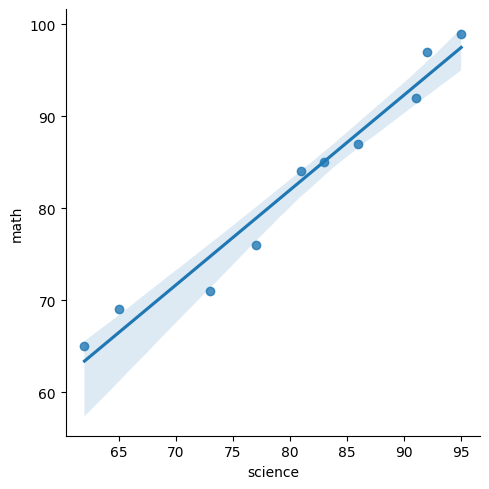

In [23]:
# 수학 - 과학 회귀그래프그리기
sns.lmplot(x='science', y='math',data=df)

## 회귀분석을 위해 종속(Y=수학), 독립(X=과학)
## 과학점수를 알면 수학점수를 예상 할 수 있다. 
## 단순선형회귀 모형 

In [24]:
import statsmodels.api as sm
lin_reg = sm.OLS.from_formula("math ~ science + english", df).fit() #회귀분석하는 함수이다. 
print(lin_reg.summary())
#dependent variable : math r-squared 0.96 f 통계량 218  p-value  유의확률 0에 가까워서 아주 유의미하다 회귀분석 R-square, probability intercept, 


                            OLS Regression Results                            
Dep. Variable:                   math   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     164.4
Date:                Wed, 05 Jun 2024   Prob (F-statistic):           1.31e-06
Time:                        13:36:59   Log-Likelihood:                -19.037
No. Observations:                  10   AIC:                             44.07
Df Residuals:                       7   BIC:                             44.98
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5694      4.667     -0.122      0.9

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


## 데이터추론

In [25]:
import pandas as pd
x1 = {'science': [50, 80], 'english' : [60, 85]} #2개의 값을 test data를 통해 정확한 값 예측
x=pd.DataFrame(x1)
lin_reg.predict(x)
#여기까지 회귀분석 연속된 값 추론 
#과학점수가 50, 80점, 영어점수가 60점, 85점인 사람은 수학점수가 55점 83점이다. 

0    55.902095
1    83.661113
dtype: float64

## 다중공선성 VIF 여기서는 고려하지 않음.

# 분류문제 
## 로지스틱 회귀

In [26]:
#분류형 문제 죽었냐 살았냐 회귀를 쓸 때 로지스틱 회귀를 쓴다. 

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


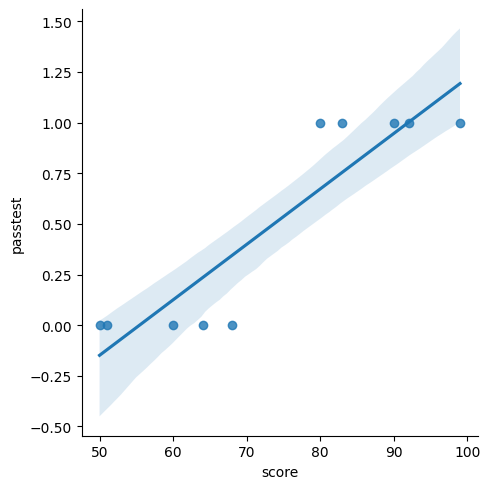

In [2]:
import pandas as pd           #판다스
import seaborn as sns          #시본 

# DataFrame 생성
passtest = [0,0,0,0,0,1,1,1,1,1] #리스트를 만들기를 0000011111 두개의 분류(죽거나 살거나) 
score = [51, 64, 60, 50, 68, 80, 90, 92, 99,83] #실패 80부터 83까지 
df = pd.DataFrame({"passtest": passtest, "score": score } )

#상관분석
sns.lmplot(x='score', y='passtest',data=df) # , logistic=True

#옳지 않은 방법. 선형회귀분석은 맞지 않다. 분류문제에서는 직선 수식 때문에 시그모이드 함수를 쓴다. 

## 시그모이드 함수

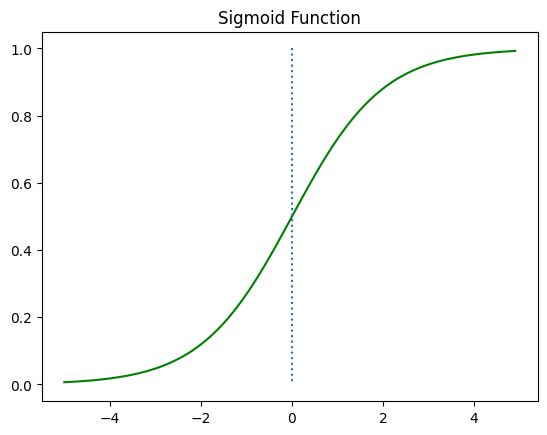

In [3]:
#  a는 1, b는 0임을 가정한 그래프입니다.
import numpy as np # 넘파이 사용
import matplotlib.pyplot as plt # 맷플롯립 사용
def sigmoid(x):
    return 1/(1+np.exp(-x)) #중요! 시그모이드 함수 
x = np.arange(-5.0, 5.0, 0.1) #numpy 라이브러리에서 숫자와 배열을 다루는 라이브러리를 가져온다. -5에서 5까지 0.1씩 증가시키는 배열의 함수를 불러온다. 
y = sigmoid(x)

plt.plot(x, y, 'g')
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가 0에 해당되는 점선을 그린다. 0을 기준으로 했을 때 0.5보다 크면 1로 보내버린다. 값이 잘 분류가 된다. 0.5를 작으면 0으로 보내고 0.5보다 크면 1로 보낸다. 
plt.title('Sigmoid Function')
plt.show()

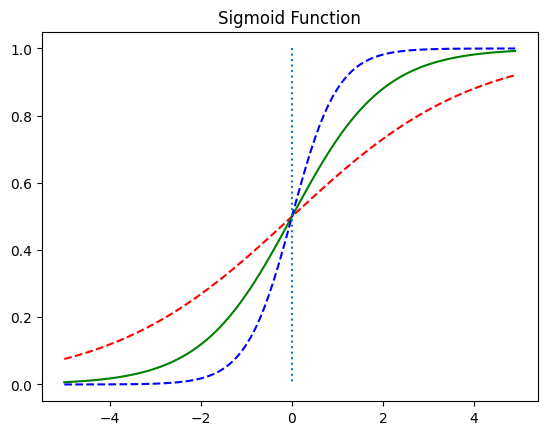

In [4]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5*x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)

plt.plot(x, y1, 'r', linestyle='--') # W의 값이 0.5일때
plt.plot(x, y2, 'g') # W의 값이 1일때
plt.plot(x, y3, 'b', linestyle='--') # W의 값이 2일때
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

passtest = [0,0,0,0,0,1,1,1,1,1]
score = [51, 64, 60, 50, 68, 80, 90, 92, 99,83]
df = pd.DataFrame({"passtest": passtest, "score": score } )

x = df[['score']]
y = df[['passtest']]

x_test = np.array([[20], [30], [90]])

lr = LogisticRegression()
lr.fit(x, y)


print(lr.score(x,y))
lr.coef_

lr.predict(x_test)

1.0


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0, 0, 1], dtype=int64)

In [ ]:
#LogisticRegression 모델에서 lr.score(x, y)를 호출하여 얻은 값이 1.0인 경우, 이는 모델이 학습 데이터에 대해 100% 정확도로 예측했다는 의미입니다. 즉, 학습 데이터의 모든 샘플에 대해 정확한 클래스 (0 또는 1)를 예측했습니다.